In [16]:
print("--- Defined Functions and Derivatives ---")
print(f"Problem A: f(x) = x^5 + x - 1             | f'(x) = 5x^4 + 1")
print(f"Problem B: f(x) = x^5 + 5x^3 - 4x + 1     | f'(x) = 5x^4 + 15x^2 - 4")
print(f"Problem C: f(x) = x^5 + 2x^4 - x - 3      | f'(x) = 5x^4 + 8x^3 - 1")
print(f"Problem D: f(x) = x^5 - 10                | f'(x) = 5x^4")
print(f"Problem E: f(x) = x^5 + 2x^2 + x - 0.5    | f'(x) = 5x^4 + 4x + 1")

--- Defined Functions and Derivatives ---
Problem A: f(x) = x^5 + x - 1             | f'(x) = 5x^4 + 1
Problem B: f(x) = x^5 + 5x^3 - 4x + 1     | f'(x) = 5x^4 + 15x^2 - 4
Problem C: f(x) = x^5 + 2x^4 - x - 3      | f'(x) = 5x^4 + 8x^3 - 1
Problem D: f(x) = x^5 - 10                | f'(x) = 5x^4
Problem E: f(x) = x^5 + 2x^2 + x - 0.5    | f'(x) = 5x^4 + 4x + 1


In [20]:
import pandas as pd

# ==========================================
#  Newton-Raphson Implementation
# ==========================================
def newton_raphson(func, dfunc, x0, tolerance=1e-6, max_iter=100):
    
    print(f"\n{'Iter':<5} {'x_current':<15} {'f(x)':<15} {'f\'(x)':<15} {'Error (%)':<15}")
    print("-" * 75)
    
    x_current = x0
    
    for i in range(max_iter):
        f_val = func(x_current)
        df_val = dfunc(x_current)
        
        if abs(df_val) < 1e-15:
            print(f"Error: Derivative is too close to zero at x = {x_current}. Method failed.")
            return None
            
        x_next = x_current - (f_val / df_val)
        
        if x_next != 0:
            error = abs((x_next - x_current) / x_next) * 100
        else:
            error = 0.0
            
        print(f"{i+1:<5} {x_current:<15.6f} {f_val:<15.6f} {df_val:<15.6f} {error:<15.6f}")

        if error < tolerance:
            print("-" * 75)
            print(f"Success! Root found at x = {x_next:.6f}")
            return x_next
        
        # Update for next loop
        x_current = x_next
        
    print("Max iterations reached without convergence.")
    return x_current

def f_a(x): return x**5 + x - 1
def df_a(x): return 5 * x**4 + 1

def f_b(x): return x**5 + 5*x**3 - 4*x + 1
def df_b(x): return 5*x**4 + 15*x**2 - 4

def f_c(x): return x**5 + 2*x**4 - x - 3
def df_c(x): return 5*x**4 + 8*x**3 - 1

def f_d(x): return x**5 - 10
def df_d(x): return 5*x**4

def f_e(x): return x**5 + 2*x**2 + x - 0.5
def df_e(x): return 5*x**4 + 4*x + 1

problems_to_solve = [
    ("Problem A", f_a, df_a, 0.5),
    ("Problem B", f_b, df_b, 0.5),
    ("Problem C", f_c, df_c, 1.0),
    ("Problem D", f_d, df_d, 1.5),
    ("Problem E", f_e, df_e, 0.0)
]

# Loop through the list and run your function
for name, func, dfunc, guess in problems_to_solve:
    print(f"\n\n{'='*30}")
    print(f" SOLVING {name}")
    print(f" Initial Guess: {guess}")
    print(f"{'='*30}")
    
    newton_raphson(func, dfunc, x0=guess)



 SOLVING Problem A
 Initial Guess: 0.5

Iter  x_current       f(x)            f'(x)           Error (%)      
---------------------------------------------------------------------------
1     0.500000        -0.468750       1.312500        41.666667      
2     0.857143        0.319807        3.698875        11.218718      
3     0.770682        0.042562        2.763889        2.038871       
4     0.755283        0.001064        2.627079        0.053653       
5     0.754878        0.000001        2.623592        0.000036       
6     0.754878        0.000000        2.623590        0.000000       
---------------------------------------------------------------------------
Success! Root found at x = 0.754878


 SOLVING Problem B
 Initial Guess: 0.5

Iter  x_current       f(x)            f'(x)           Error (%)      
---------------------------------------------------------------------------
1     0.500000        -0.343750       0.062500        91.666667      
2     6.000000        

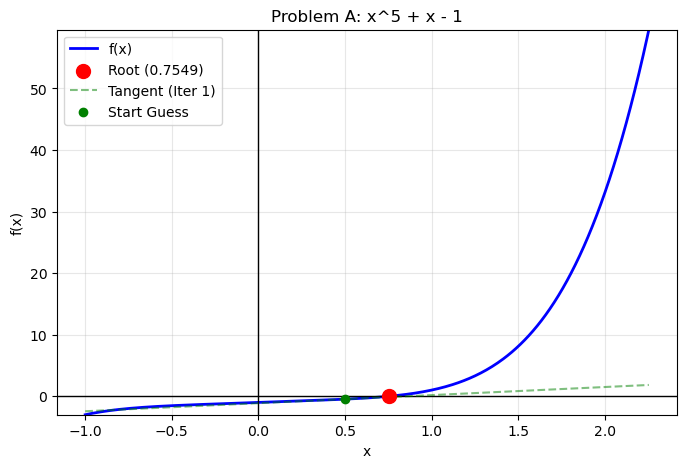

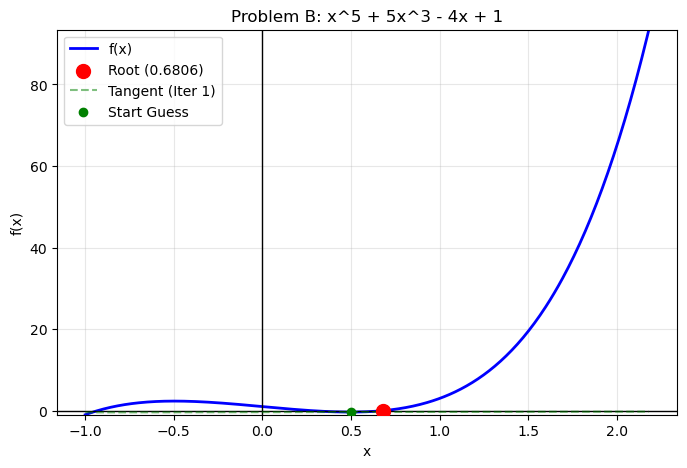

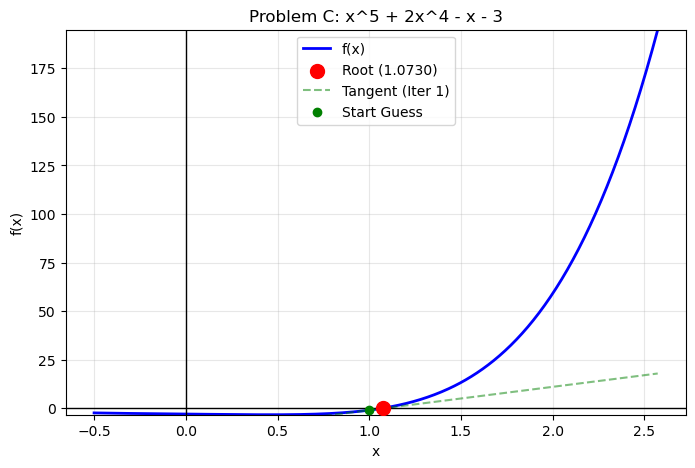

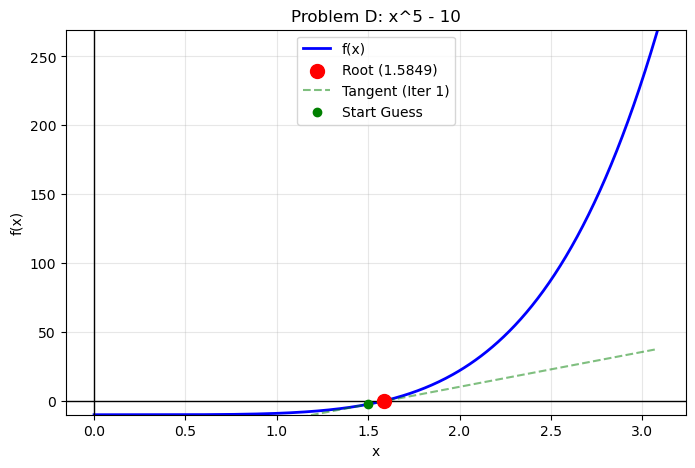

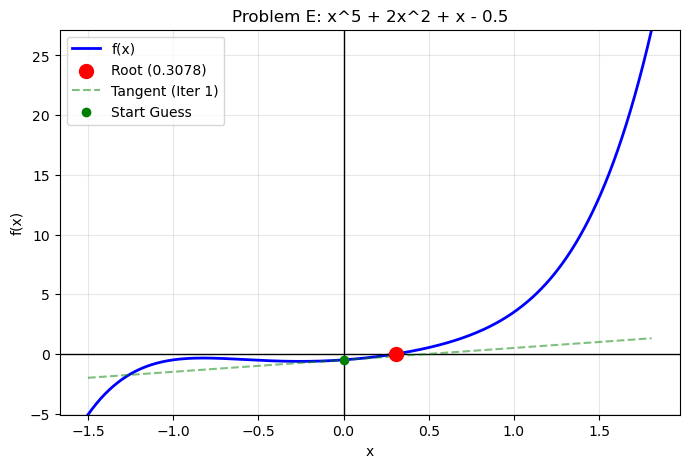

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# ==========================================
# Task 3
# ==========================================

def f_a(x): return x**5 + x - 1
def df_a(x): return 5 * x**4 + 1

def f_b(x): return x**5 + 5*x**3 - 4*x + 1
def df_b(x): return 5*x**4 + 15*x**2 - 4

def f_c(x): return x**5 + 2*x**4 - x - 3
def df_c(x): return 5*x**4 + 8*x**3 - 1

def f_d(x): return x**5 - 10
def df_d(x): return 5*x**4

def f_e(x): return x**5 + 2*x**2 + x - 0.5
def df_e(x): return 5*x**4 + 4*x + 1

def get_root(func, dfunc, x0):
    x = x0
    for _ in range(50): 
        try:
            x_new = x - func(x)/dfunc(x)
            if abs(x_new - x) < 1e-6: return x_new
            x = x_new
        except ZeroDivisionError:
            return None
    return x

def plot_results(func, dfunc, x0, title):
    root = get_root(func, dfunc, x0)
    
    if root is None:
        print(f"Skipping plot for {title} (Did not converge)")
        return

    margin = 1.5
    start = min(x0, root) - margin
    end = max(x0, root) + margin
    x_range = np.linspace(start, end, 400)
    
    y_values = func(x_range)
    
    plt.figure(figsize=(8, 5))
    
    plt.plot(x_range, y_values, label='f(x)', color='blue', linewidth=2)
    
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)
    
    plt.scatter(root, 0, color='red', s=100, zorder=5, label=f'Root ({root:.4f})')
    
    slope = dfunc(x0)
    y_intercept = func(x0)
    tangent_y = slope * (x_range - x0) + y_intercept
    
    plt.plot(x_range, tangent_y, '--', color='green', alpha=0.5, label='Tangent (Iter 1)')
    plt.scatter(x0, y_intercept, color='green', zorder=5, label='Start Guess')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(min(y_values), max(y_values)) 
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.show()

problems = [
    ("Problem A: x^5 + x - 1", f_a, df_a, 0.5),
    ("Problem B: x^5 + 5x^3 - 4x + 1", f_b, df_b, 0.5),
    ("Problem C: x^5 + 2x^4 - x - 3", f_c, df_c, 1.0),
    ("Problem D: x^5 - 10", f_d, df_d, 1.5),
    ("Problem E: x^5 + 2x^2 + x - 0.5", f_e, df_e, 0.0)
]


for name, f, df, guess in problems:
    plot_results(f, df, guess, name)